In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})  # Cambia el tamaño global

file_id = '1h97krjdPVuKszy9NVcZiWNQuPUu3ICyc' #version con artist_id
url = f'https://drive.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(url)

In [2]:
import seaborn as sns

# 🎨 Generar 15 colores ultra diferenciados
palette = sns.color_palette("tab20", 20).as_hex()  # Partimos de tab20 por su variedad
# Seleccionamos 15 bien distribuidos
selected_colors = [palette[i] for i in range(0, 20, 20 // 15)][:15]

artist_colors = {f"A{str(i).zfill(2)}": color for i, color in enumerate(selected_colors, start=1)}

print(artist_colors)


{'A01': '#1f77b4', 'A02': '#aec7e8', 'A03': '#ff7f0e', 'A04': '#ffbb78', 'A05': '#2ca02c', 'A06': '#98df8a', 'A07': '#d62728', 'A08': '#ff9896', 'A09': '#9467bd', 'A10': '#c5b0d5', 'A11': '#8c564b', 'A12': '#c49c94', 'A13': '#e377c2', 'A14': '#f7b6d2', 'A15': '#7f7f7f'}


## 1. Boxplot de distribución de royalties por artista

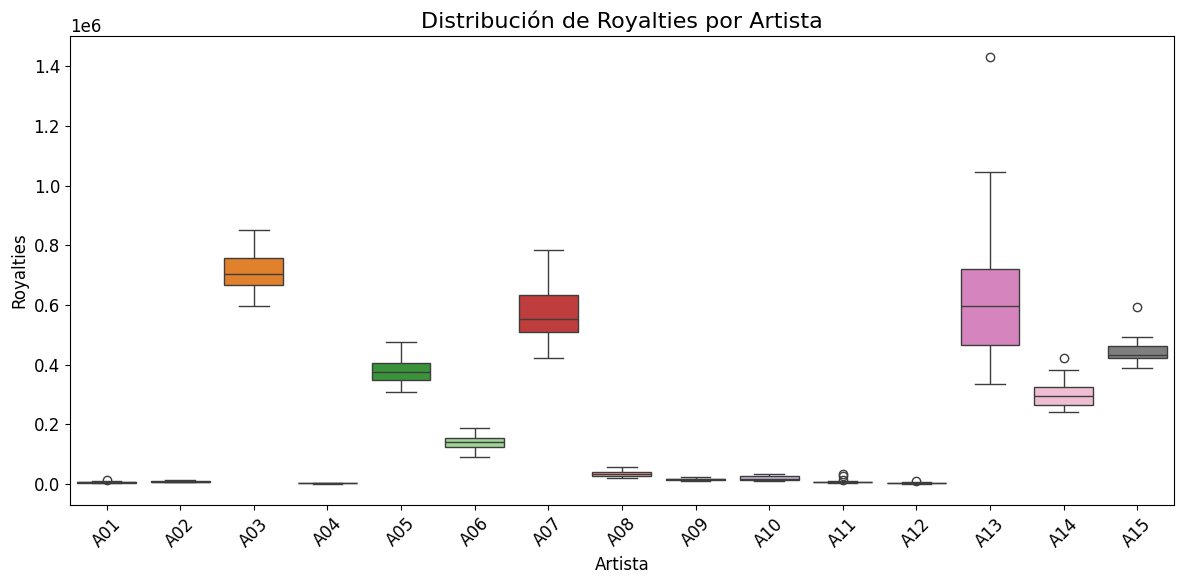

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="artist_id",
    y="royalties",
    hue="artist_id",        # 🎯 Usar como hue para aplicar la paleta
    data=df,
    palette=artist_colors,
    legend=False
)
plt.xticks(rotation=45)
plt.title("Distribución de Royalties por Artista", fontsize=16)
plt.xlabel("Artista", fontsize=12)
plt.ylabel("Royalties", fontsize=12)
plt.tight_layout()
plt.savefig("boxplot_royalties_por_artista.png", dpi=300)
plt.show()


1. Artistas con mayores ingresos y variabilidad:<br>A13, A03 y A07 presentan valores altos de royalties y también una gran dispersión (alto IQR), lo que sugiere ingresos elevados pero variables.
A13 incluso muestra valores atípicos muy altos, indicando meses excepcionalmente buenos.

2. Artistas con ingresos estables pero bajos:<br>A10, A12, A04 y A01 tienen cajas pequeñas y cercanas a cero. Esto sugiere ingresos bajos y poco variables.

3. Artistas con outliers interesantes:<br>A15 y A11 presentan valores atípicos mucho más altos que su mediana.
En el caso de A11, por ejemplo, uno de los meses con royalties inusualmente altos coincide con un lanzamiento de track (track_release = 1) y un sentimiento positivo elevado en redes.
El artista A15 tuvo un pico de royalties en enero de 2021 sin haber lanzado un track ese mes, lo que podría deberse a reproducciones acumuladas de un éxito anterior, impulso algorítmico de Spotify o pagos diferidos por streams previos.


## 2. Línea de tiempo de royalties por artista

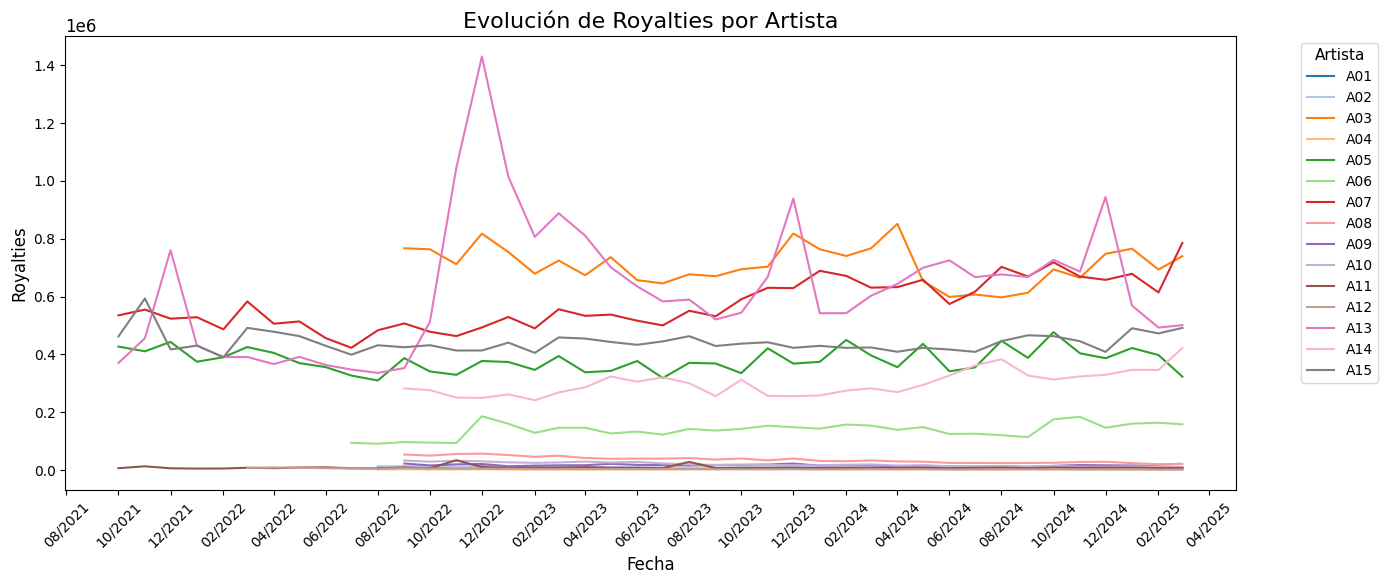

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Asegurarte de que 'fecha' sea tipo datetime
df["fecha"] = pd.to_datetime(df["fecha"])

plt.figure(figsize=(14, 6))

# Paleta de colores con 15 tonos diferentes
#colors = plt.cm.tab20(np.linspace(0, 1, len(df["artist_id"].unique())))
colors = palette

# Graficar cada artista con un color único
for color, artist_id in zip(colors, sorted(df["artist_id"].unique())):
    df_artist = df[df["artist_id"] == artist_id].sort_values("fecha")
    plt.plot(df_artist["fecha"], df_artist["royalties"], label=artist_id, color=color)

plt.title("Evolución de Royalties por Artista", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Royalties", fontsize=12)
plt.legend(
    title="Artista",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=10,
    title_fontsize=11
)

# Formatear eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("linea_tiempo_royalties_por_artista.png", dpi=300)
plt.show()



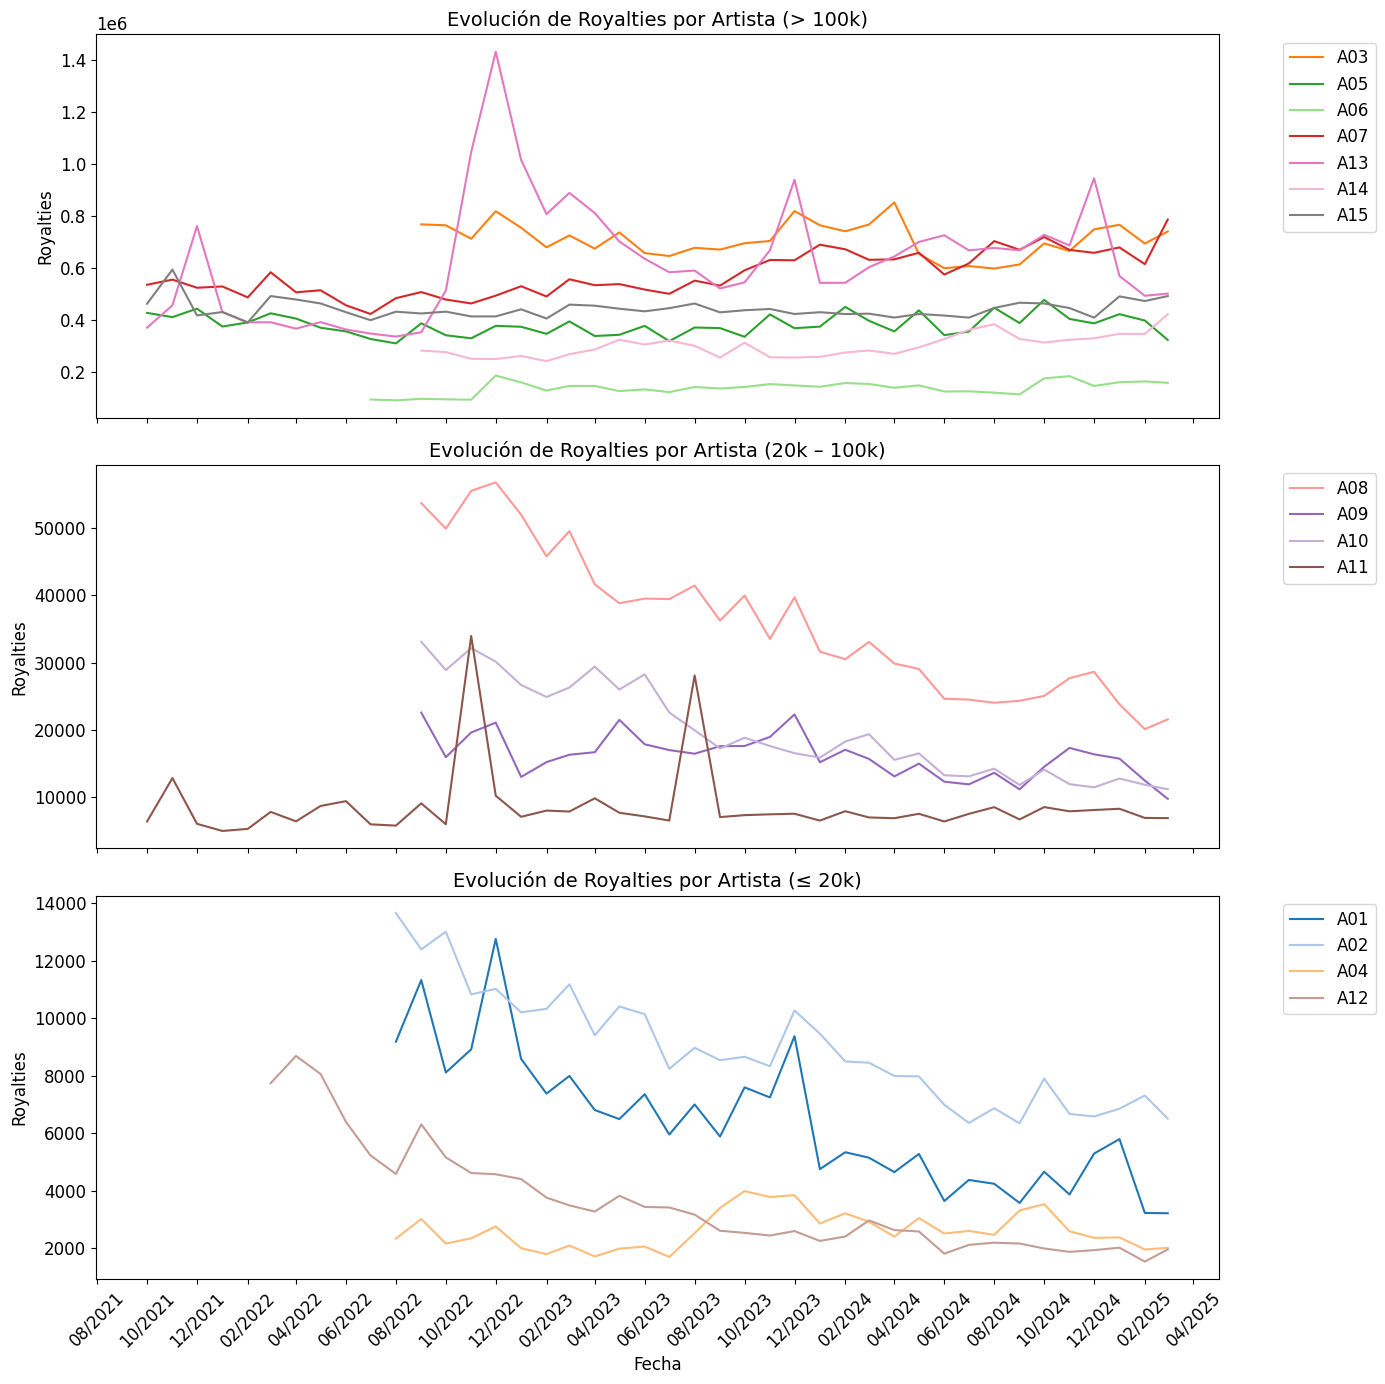

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

df["fecha"] = pd.to_datetime(df["fecha"])

# Definir umbrales
threshold_high = 1e5   # 100k
threshold_mid  = 2e4   # 20k

# Máximo por artista
max_royalties = df.groupby("artist_id")["royalties"].max()

# Grupos
high_artists  = max_royalties[max_royalties > threshold_high].index
mid_artists   = max_royalties[(max_royalties > threshold_mid) & (max_royalties <= threshold_high)].index
low_artists   = max_royalties[max_royalties <= threshold_mid].index

# Colores consistentes
unique_artists = sorted(df["artist_id"].unique())
color_map = {artist: color for artist, color in zip(unique_artists, palette)}

# Crear 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

# --- Altos ---
for artist_id in high_artists:
    df_artist = df[df["artist_id"] == artist_id].sort_values("fecha")
    axes[0].plot(df_artist["fecha"], df_artist["royalties"], label=artist_id, color=color_map[artist_id])

axes[0].set_title("Evolución de Royalties por Artista (> 100k)", fontsize=14)
axes[0].set_ylabel("Royalties", fontsize=12)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# --- Medios ---
for artist_id in mid_artists:
    df_artist = df[df["artist_id"] == artist_id].sort_values("fecha")
    axes[1].plot(df_artist["fecha"], df_artist["royalties"], label=artist_id, color=color_map[artist_id])

axes[1].set_title("Evolución de Royalties por Artista (20k – 100k)", fontsize=14)
axes[1].set_ylabel("Royalties", fontsize=12)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# --- Bajos ---
for artist_id in low_artists:
    df_artist = df[df["artist_id"] == artist_id].sort_values("fecha")
    axes[2].plot(df_artist["fecha"], df_artist["royalties"], label=artist_id, color=color_map[artist_id])

axes[2].set_title("Evolución de Royalties por Artista (≤ 20k)", fontsize=14)
axes[2].set_xlabel("Fecha", fontsize=12)
axes[2].set_ylabel("Royalties", fontsize=12)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Formato eje X
for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.tick_params(axis="x", rotation=45, labelsize=12)
    ax.tick_params(axis="y", labelsize=12)

plt.tight_layout()
plt.savefig("linea_tiempo_royalties_3niveles.png", dpi=300)
plt.show()


1. Artistas con ingresos más altos y variables:<br>A13: Tiene picos marcados que superan el millón, pero también bajones abruptos. Si bien no muestra una tendencia clara, sus ingresos son irregulares y podrían depender de campañas o eventos puntuales.<br>A03 y A07: Tienen valores altos en general. En el caso de A03, se observa una leve caída hacia los últimos meses, lo que puede indicar un descenso en su rendimiento. A07 parece mantener mayor estabilidad.

2. Artistas con trayectorias estables:<br>A05, A14 y A08 muestran líneas relativamente constantes a lo largo del tiempo. Esto sugiere una base sólida de reproducciones, posiblemente por tener un catálogo activo y estable.

3. Artistas con ingresos bajos:<br>A09, A02 y A12 tienen ingresos bajos de forma consistente. Esto puede deberse a menor presencia en plataformas o una carrera más reciente en desarrollo.


## 3. Scatter plot de media vs desvío estándar de royalties

In [6]:
# Asegurarse de que la columna 'fecha' esté en formato datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Agrupar por artista y calcular estadísticas resumen
grouped = df.groupby("artist_id")

summary_stats = pd.DataFrame({
    "cantidad_registros": grouped.size(),
    "media_royalties": grouped["royalties"].mean(),
    "desvio_royalties": grouped["royalties"].std(),
    "max_royalties": grouped["royalties"].max(),
    "min_royalties": grouped["royalties"].min(),
    "columnas_nulas": grouped.apply(lambda x: x.isna().sum().sum())
}).reset_index()


/tmp/ipython-input-250718087.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  "columnas_nulas": grouped.apply(lambda x: x.isna().sum().sum())


In [ ]:
#!pip install plotly

In [7]:
import plotly.express as px

fig = px.scatter(
    summary_stats,
    x="media_royalties",
    y="desvio_royalties",
    color="artist_id",
    text="artist_id",
    title="Media vs Desvío de Royalties por Artista",
    labels={
        "media_royalties": "Media de Royalties",
        "desvio_royalties": "Desvío Estándar de Royalties"
    },
    width=900,
    height=700,
    color_discrete_sequence=palette
)

# Ajustar tamaño de fuente general
fig.update_layout(
    title=dict(font=dict(size=20)),  # Título
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=12)),  # Eje X
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=12)),  # Eje Y
    legend=dict(font=dict(size=12))  # Leyenda
)

# Ajustar tamaño de las etiquetas de texto sobre los puntos
fig.update_traces(
    textposition='top center',
    textfont=dict(size=12),
    marker=dict(size=12),
    showlegend=False
)

fig.show()



Este gráfico compara el promedio de ingresos por royalties con su variabilidad para cada artista. Se observa que A03 presenta ingresos elevados con una variabilidad relativamente baja, lo que lo convierte en un artista predecible y consistente. Por otro lado, A13 también tiene altos ingresos, pero acompañados de una gran dispersión, lo cual sugiere una dependencia de eventos puntuales o campañas. En el extremo opuesto, varios artistas con bajos ingresos muestran poca variación, indicando trayectorias más estables pero con menor impacto.


In [8]:
from scipy.stats import skew

# Función para contar outliers con el criterio de 1.5 * IQR
def count_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    outliers = x[(x < q1 - 1.5 * iqr) | (x > q3 + 1.5 * iqr)]
    return len(outliers)

# Agrupar por artista
grouped = df.groupby("artist_id")

# Calcular métricas y agregarlas al DataFrame summary_stats
summary_stats["outliers_royalties"] = grouped["royalties"].apply(count_outliers).values
summary_stats["skewness_royalties"] = grouped["royalties"].apply(lambda x: skew(x.dropna())).values


## 1. Media de royalties por artista

/tmp/ipython-input-2968441214.py:5: UserWarning:

The palette list has more values (20) than needed (15), which may not be intended.



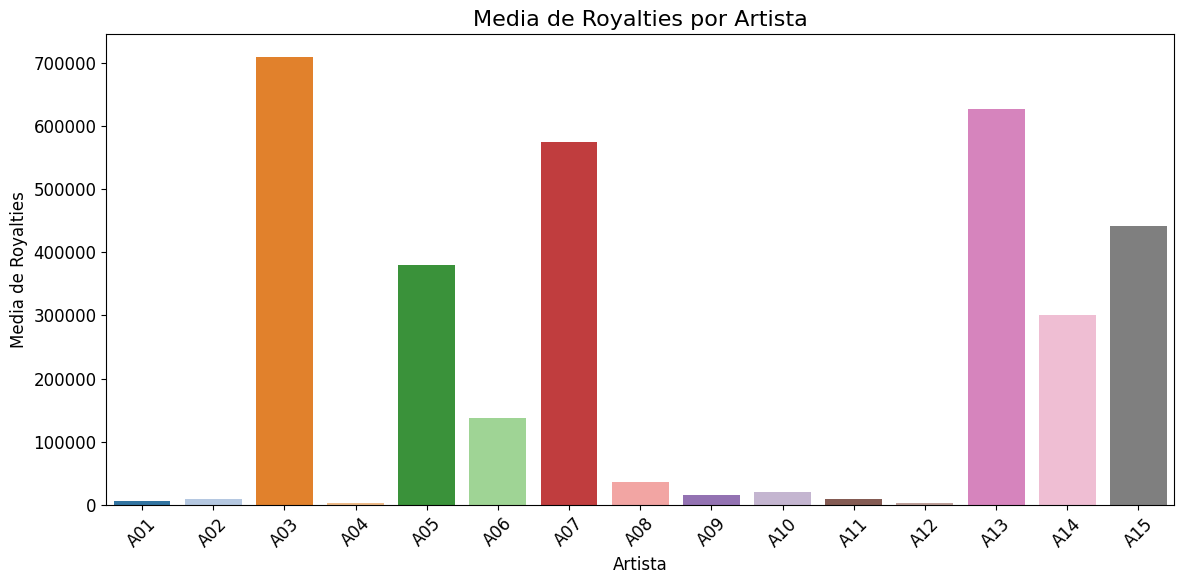

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    x="artist_id",
    y="media_royalties",
    hue="artist_id",
    data=summary_stats,
    palette=palette,
    legend=False
)
plt.title("Media de Royalties por Artista", fontsize=16)
plt.xlabel("Artista", fontsize=12)
plt.ylabel("Media de Royalties", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("media_royalties_por_artista.png", dpi=300)
plt.show()


El análisis de la media de royalties por artista muestra que A03 lidera en ingresos promedio, seguido por A13, A07 y A15. Estos artistas concentran el mayor rendimiento económico dentro del grupo. En el otro extremo, artistas como A12, A04 y A02 presentan ingresos promedio considerablemente bajos, lo que podría estar asociado a menor exposición o una carrera incipiente. Finalmente, casos intermedios como A14 y A05 podrían representar un segmento con buen potencial de crecimiento sostenido.


## 2. Cantidad de outliers por artista

/tmp/ipython-input-441568059.py:2: UserWarning:

The palette list has more values (20) than needed (15), which may not be intended.



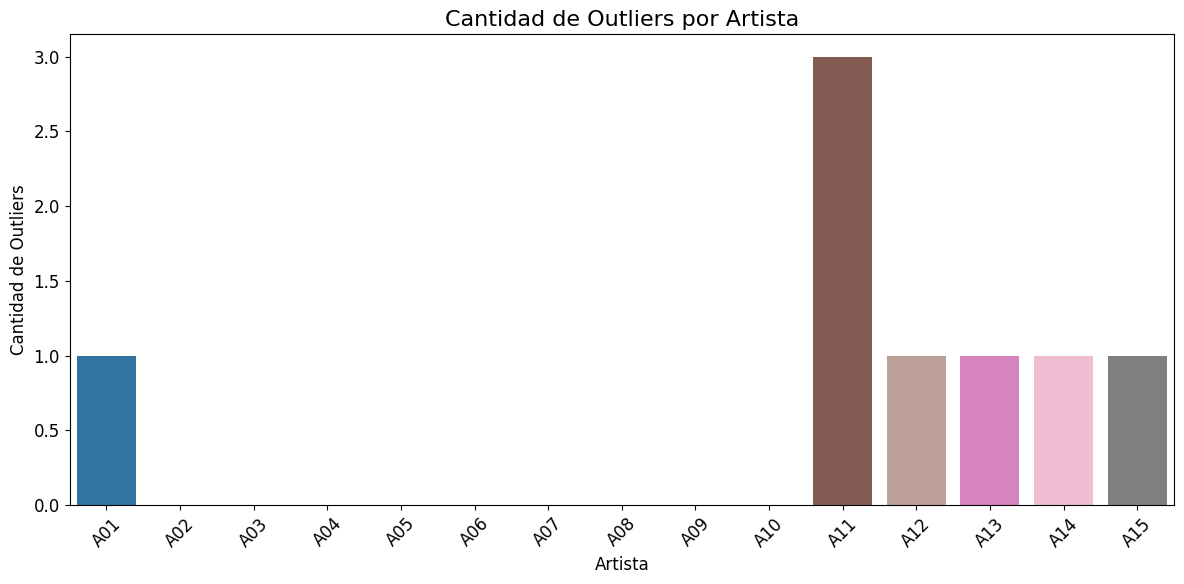

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="artist_id",
    y="outliers_royalties",
    hue="artist_id",
    data=summary_stats,
    palette=palette,
    legend=False
)
plt.title("Cantidad de Outliers por Artista", fontsize=16)
plt.xlabel("Artista", fontsize=12)
plt.ylabel("Cantidad de Outliers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outliers_por_artista.png", dpi=300)
plt.show()



El análisis de outliers en los ingresos revela que la mayoría de los artistas presentan trayectorias estables, sin ingresos mensuales que se desvíen significativamente del promedio. Sin embargo, casos como A11, con tres valores atípicos, evidencian un comportamiento más irregular, posiblemente asociado a eventos puntuales de alto impacto o a pagos acumulados.


## 3. Skewness (asimetría) de royalties por artista

/tmp/ipython-input-48198031.py:2: UserWarning:

The palette list has more values (20) than needed (15), which may not be intended.



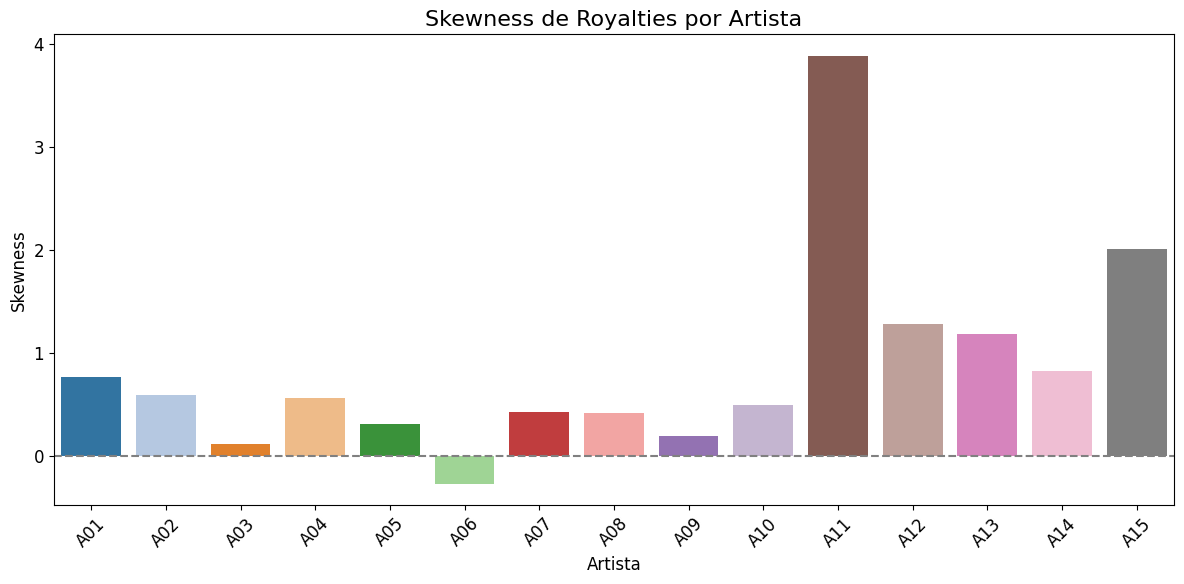

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="artist_id",
    y="skewness_royalties",
    hue="artist_id",
    data=summary_stats,
    palette=palette,
    legend=False
)
plt.title("Skewness de Royalties por Artista", fontsize=16)
plt.xlabel("Artista", fontsize=12)
plt.ylabel("Skewness", fontsize=12)

# Línea que representa simetría
plt.axhline(0, color='gray', linestyle='--')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("skewness_por_artista.png", dpi=300)
plt.show()


El análisis de skewness revela que artistas como A11 y A15 presentan distribuciones altamente asimétricas hacia la derecha, lo que refleja meses con ingresos excepcionalmente altos. Esto es consistente con la presencia de outliers y sugiere un comportamiento más errático o dependiente de eventos puntuales. Por el contrario, artistas como A06 y A03 muestran distribuciones más simétricas, indicativas de una trayectoria más regular y predecible.


## Conclusiones generales del análisis por artista
* Volumen de datos disponible:  
La mayoría de los artistas cuentan con más de 30 registros mensuales, lo que permite realizar un análisis temporal sólido y aplicar modelos de predicción con cierta estabilidad.

* Ingresos promedio y extremos:  
Se observaron grandes diferencias en los valores medios de royalties entre artistas. Por ejemplo, A07 alcanza un promedio mensual de &#36;573.914, mientras que A10 apenas llega a &#36;19.701. Estas brechas pueden estar asociadas al nivel de exposición, popularidad o al tipo de contrato de cada artista.

* Variabilidad de ingresos:  
Artistas como A07 y A14 presentan una alta variabilidad en sus ingresos, posiblemente por lanzamientos puntuales, campañas o estacionalidad. En cambio, otros artistas muestran ingresos más estables, lo que resulta favorable para tareas de predicción.

* Presencia de outliers:  
En general, la cantidad de valores atípicos fue baja. Sin embargo, casos como A11 (con tres outliers) indican comportamientos irregulares y picos inusuales de ingresos. Estos pueden estar relacionados con eventos específicos o pagos acumulados.

* Asimetría de la distribución (Skewness):  
La mayoría de los artistas presentan distribuciones con asimetría positiva leve, indicando ingresos concentrados por debajo del promedio con algunos picos elevados. A11 se destaca por una asimetría alta, coherente con su comportamiento irregular. A06 fue el único caso con skewness negativo, posiblemente reflejando una caída progresiva o un pico temprano seguido de ingresos bajos.

* Valores faltantes:  
No se detectaron valores nulos en las variables clave, lo que indica una buena calidad del dataset y lo vuelve apto para análisis predictivo sin necesidad de imputaciones.

## Relación entre variables externas y los ingresos por royalties
* Seguidores en Instagram:  
Presentan una correlación positiva moderada (0.23) con los royalties, lo que sugiere que una mayor presencia en esta red social podría influir favorablemente en los ingresos.

* Track release:  
La variable track_release muestra una correlación baja pero positiva (0.09). Aunque su efecto no es fuerte, podría tener impacto combinado con estrategias promocionales.

* Seguidores en Twitter:  
Sorprendentemente, tienen una correlación ligeramente negativa (-0.07) con los ingresos. Esto podría reflejar una menor efectividad de esta red para impulsar monetización directa.

* Sentimiento en redes:  
La variable sentiment (calculada a partir de comentarios en Instagram) presenta una correlación negativa más marcada (-0.15), lo que sugiere que un mayor sentimiento positivo no necesariamente se traduce en mayores ingresos, posiblemente por la naturaleza ambigua o no comercial de ciertos picos de visibilidad.

# Interpretación general:  
Si bien ninguna variable externa presenta una correlación alta, los seguidores en Instagram se perfilan como un factor con cierta influencia. Esta variable podría ser útil en modelos de predicción o segmentación. Por el contrario, el sentimiento social requiere un análisis más profundo, posiblemente desagregado por eventos, ya que su efecto no parece ser inmediato ni lineal.


# Importancia de Variables

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# --- Definir variables ---
target = "royalties"

# --- Filtrar variables predictoras (numéricas que NO contengan "royalties") ---
numeric_cols = df.select_dtypes(include=["number"]).columns
predictor_cols = [col for col in numeric_cols if "royalties" not in col.lower()]

# --- Separar variables X e y ---
X = df[predictor_cols]
y = df[target]

# --- Imputar valores faltantes con la media ---
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# --- Entrenar modelo Random Forest ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_imputed, y)

# --- Obtener importancia de variables ---
importances = pd.Series(model.feature_importances_, index=predictor_cols).sort_values(ascending=False)

# Mostrar ranking
print(importances)


instagram_followers            0.413842
twitter_followers              0.138830
cant_comentarios               0.118383
sum_seguidores_menciones_3m    0.110297
mean_sentiment_3m              0.103594
sentiment                      0.042959
cant_posteos                   0.020230
growth_instagram_followers     0.018209
std_instagram_followers_6m     0.009565
growth_twitter_followers       0.007669
month                          0.006741
sum_track_releases_6m          0.005822
seguidores_menciones           0.003248
track_release                  0.000612
dtype: float64


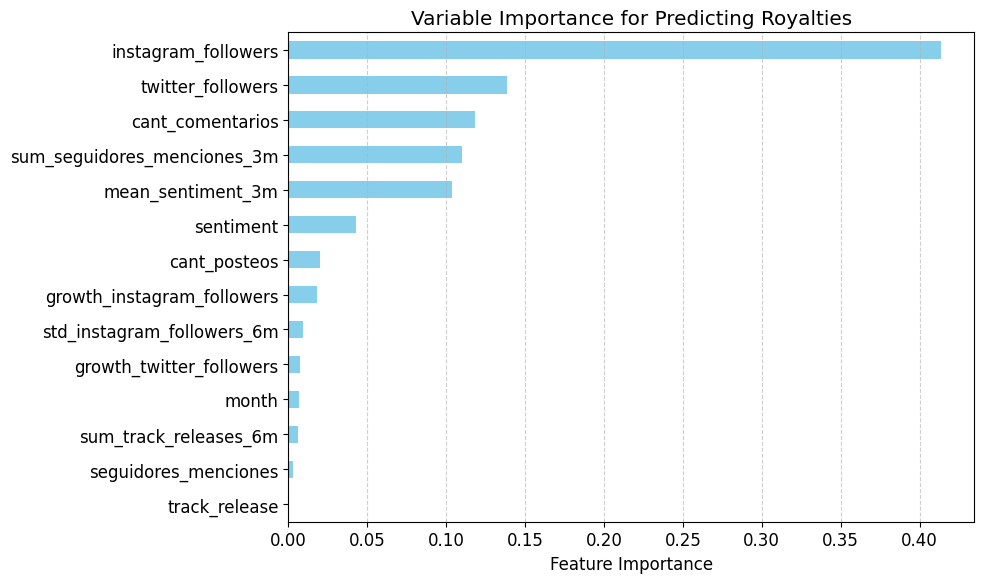

In [13]:
# --- Mostrar gráfico ---
plt.figure(figsize=(10, 6))
importances.plot(kind="barh", color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Variable Importance for Predicting Royalties")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusión sobre las variables que más influyen en los royalties
Se entrenó un modelo de regresión basado en Random Forest para identificar las variables más relevantes en la predicción de ingresos por regalías (royalties), excluyendo todas aquellas que estuvieran directamente derivadas de los propios royalties (como promedios o desvíos históricos).

Los resultados indican que:

* La cantidad de seguidores en Instagram es la variable más influyente, representando más del 40% de la importancia total del modelo. Esto sugiere que la base de seguidores es un fuerte indicador del potencial comercial de un artista.

* Le siguen en importancia la cantidad de seguidores en Twitter, el sentimiento promedio de las menciones recientes y la interacción del público (comentarios y menciones), todos con contribuciones relevantes al modelo.

* Variables como la cantidad de posteos, el crecimiento mensual de seguidores o los lanzamientos musicales recientes presentan una influencia considerablemente menor en la estimación de ingresos.

Estos hallazgos refuerzan la idea de que los indicadores de presencia y engagement en redes sociales, especialmente Instagram, son fundamentales para explicar el rendimiento económico de los artistas cuando no se dispone de datos históricos de pagos.


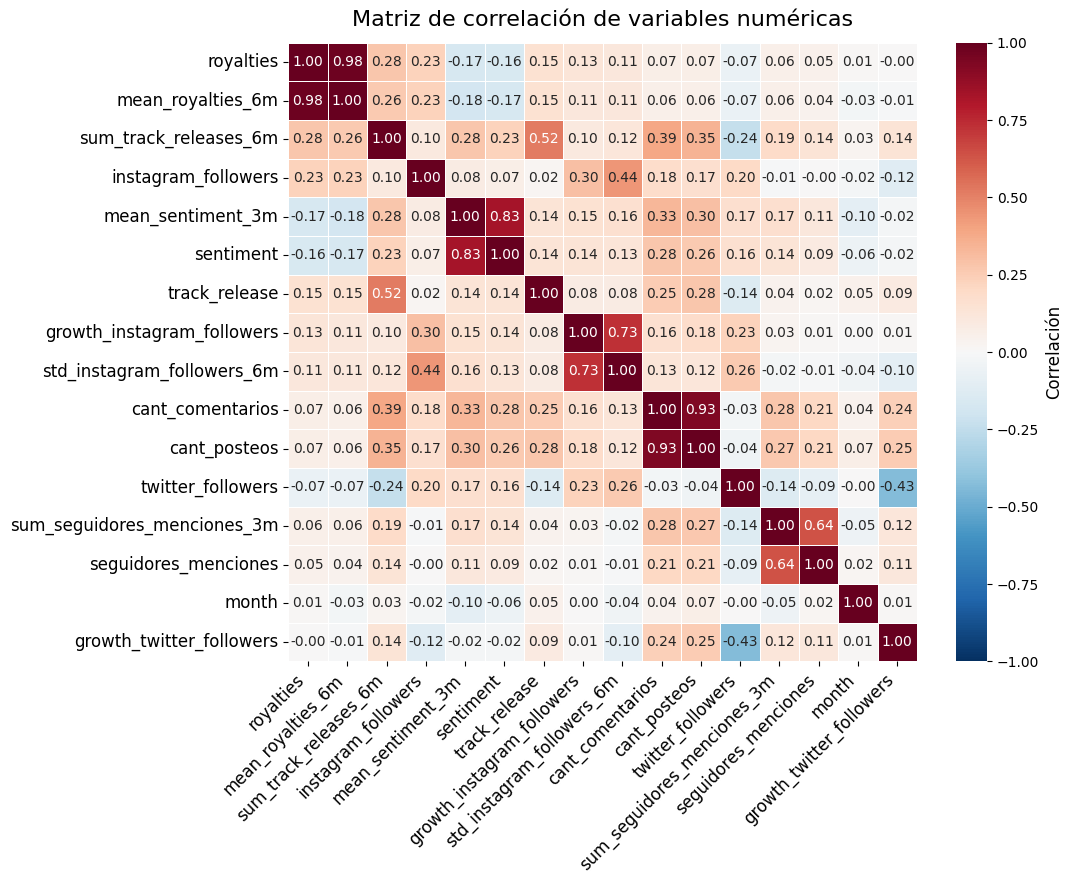

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Tomar solo columnas numéricas y calcular correlaciones
num_cols = df.select_dtypes(include="number")
corr = num_cols.corr().round(2)

# (Opcional) ordenar variables por la correlación absoluta con 'royalties'
if 'royalties' in corr.columns:
    order = corr['royalties'].abs().sort_values(ascending=False).index
    corr = corr.loc[order, order]

# --- 2) Dibujar el heatmap
plt.figure(figsize=(11, 9))
ax = sns.heatmap(
    corr,
    annot=True,              # muestra valores dentro de cada celda
    fmt=".2f",
    cmap="RdBu_r",           # paleta rojo-azul centrada en 0
    vmin=-1, vmax=1,         # fija el rango [-1, 1]
    linewidths=0.5,
    cbar_kws={"label": "Correlación"},
    annot_kws={"size": 10}    # tamaño de fuente de los números
)

# --- 3) Títulos y fuentes
ax.set_title("Matriz de correlación de variables numéricas", fontsize=16, pad=12)
ax.set_xlabel("")  # sin etiqueta en X
ax.set_ylabel("")  # sin etiqueta en Y

# Ticks
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Tamaño de la fuente de la barra de color
ax.collections[0].colorbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.savefig("matriz_correlacion.png", dpi=300)
plt.show()
